# Ames Housing Project - Linear Regression

## Problem Statement
Construct a regression model based on the Ames Housing Dataset. The model should predict the price of a house at sale using the data provided. The model should also be able to be used as a tool to explain how variables affect housing prices in Ames.


## Executive Summary


This Ames Housing Kaggle project is a streamlined version of the one found on kaggle. There are some variables that are missing, namely 'Sale Condition' which would have helped in identifying outliers in the training dataset. However, this is not an issue as the goal here is the learning process.

The aim of this project is to accurately predict housing prices in Ames, Iowa, using only **linear regression**. The data gathered is sourced from the Ames, Iowa Assessor's Office. The data includes close to 80 variables that can be used for Sale Price prediction. The official [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) has a thorough description of all 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). However as this is streamlined, some variables would not be found in this dataset.

The challenge was to reduce the number of variables in our model to a maximum of 30 whilst maintaining a reasonable kaggle score.

## Findings


Findings from the model show that these are the best predictors of house prices:
- Overall quality of the house
- Total square feet of the house
- The neighborhood the house is located in. It's all about **location, location, location**

My project submission model gave me a kaggle score of:
- Public Score: 24364.26545 
- Private Score: 36353.33983.

Personal best for a single model (did not meet the criteria of less than 30 variables): 
- Public Score: 24148.52531
- Private Score: 32916.16284

### Contents

- [Importing libraries](#Importing-libraries)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Visualizations](#Exploratory-Visualizations)
- [Feature Engineering](#Feature-Engineering)
- [Modeling](#Modeling)
- [Inferential Visualizations](#Inferential-Visualizations)
- [Business Recommendations](#Business-Recommendations)

### Importing libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler

### Loading the data
---

In [2]:
test = pd.read_csv('../datasets/test.csv')
testfile= test[['Id']]
train = pd.read_csv('../datasets/train.csv')

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

## Exploratory Data Analysis

In [3]:
#Checking the newly loaded data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
#2051 rows representing a house and 80 variables + 1 target, sale price
train.shape

(2051, 81)

The training data has 79 varaibles (excluding 'ID' and the target, 'Sale Price')
- 37 quantitative
- 42 qualitative

In [6]:
#Getting all non-objects
Quantitative = [x for x in train.columns if train[x].dtypes != 'object']

#Getting all objects
Qualitative = [x for x in train.columns if train[x].dtypes == 'object']
Quantitative.remove('Id')
Quantitative.remove('SalePrice')

In [7]:
Quantitative

['PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [8]:
Qualitative

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

### Distribution and outliers
The official data documentation does note that the distribution of SalePrice fails in the homoscedasticity assumption. Plotting the distplot for saleprice shows that it indeed is not a normal distribution:
- Saleprice is skewed left
- It has a very long right tail

1.5575514385863427
3.579003386146362


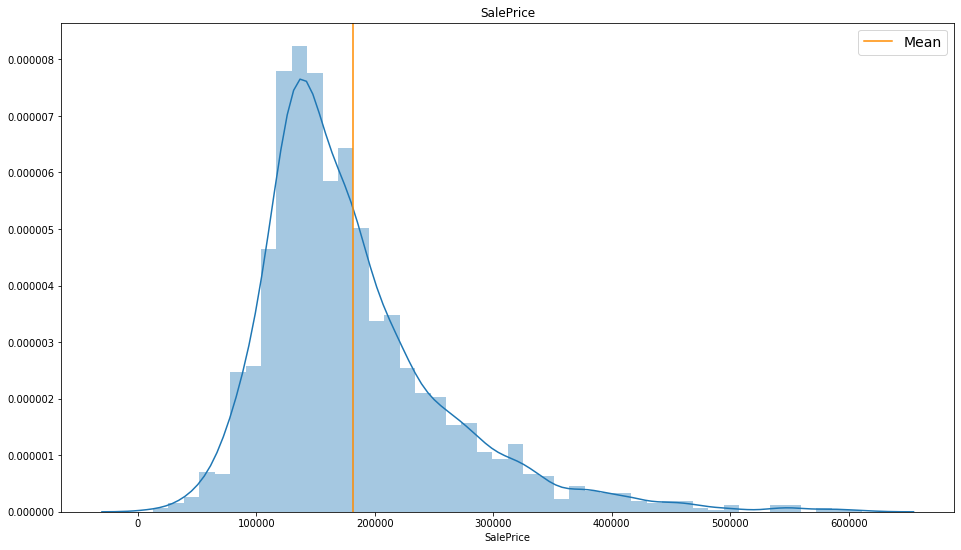

In [9]:
#Plotting the distribution of the sale price
plt.figure(figsize=(16,9))
sns.distplot(train['SalePrice']).axvline(train['SalePrice'].mean(), color='darkorange')
plt.title('SalePrice')
plt.legend({'Mean':train['SalePrice'].mean()}, fontsize=14);

#Skew and kurtosis
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

0.7868049536559992
1.2765740036627093


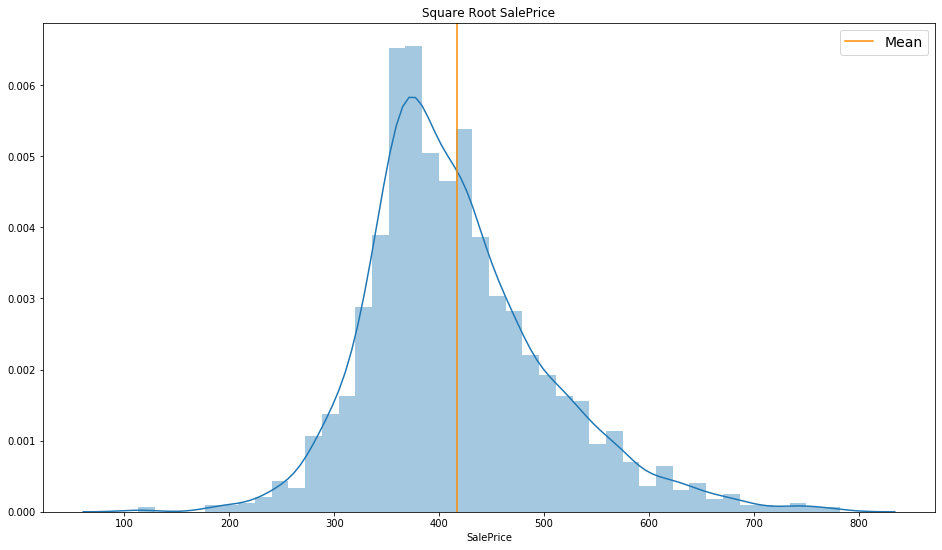

In [10]:
#Plotting the square root of saleprice.
#This looks closer to a normal distribution
plt.figure(figsize=(16,9))
sns.distplot(train['SalePrice']**0.5).axvline((train['SalePrice']**0.5).mean(), color='darkorange')
plt.title('Square Root SalePrice')
plt.legend({'Mean':(train['SalePrice']**0.5).mean()}, fontsize=14);

#Skew and kurtosis
print((train['SalePrice']**0.5).skew())
print((train['SalePrice']**0.5).kurt())

-0.14681576272177396
1.8852841342071391


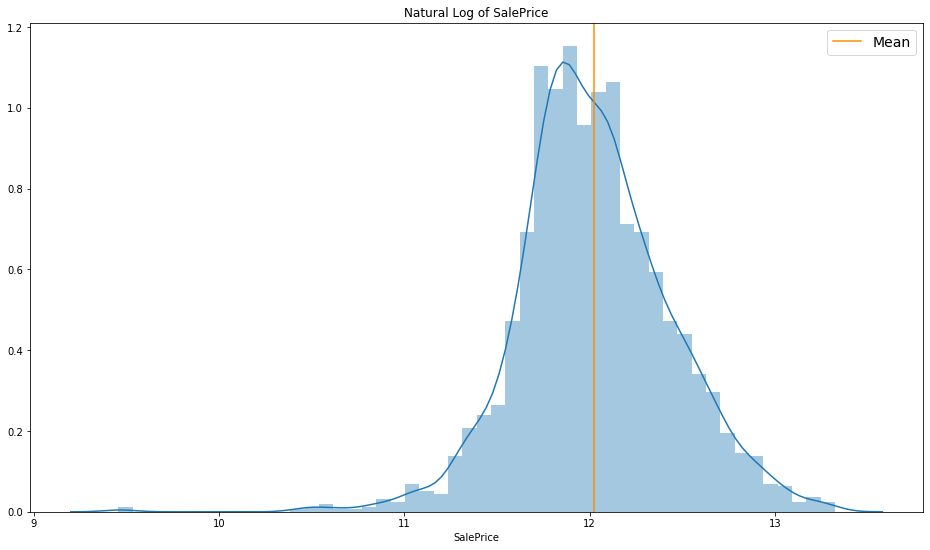

In [11]:
# However,the log of the Sale Price looks more like a normal distriubtion than the previous 2
plt.figure(figsize=(16,9))
sns.distplot(np.log(train['SalePrice'])).axvline(np.log(train['SalePrice']).mean(), color='darkorange')
plt.title('Natural Log of SalePrice')
plt.legend({'Mean': np.log(train['SalePrice']).mean()}, fontsize=14);

#Skew and kurtosis
print((np.log(train['SalePrice'])).skew())
print((np.log(train['SalePrice'])).kurt())

In [12]:
#Changing SalePrice to a logarithmic scale
train['SalePrice'] = np.log(train['SalePrice'])

### Outliers

As mentioned in the official data documentation, there are 5 observed outliers in the data set.
All outliers have a 'Gr Liv Area' of 4000 square feet. 2 of these data points can be found in the training dataset.

An additional point to note is that there seems to be some grouping of neighborhood by sale price. This will be investigated further under feature engineering

Text(0.5, 1.0, 'Gr Liv Area vs Saleprice by neighborhood')

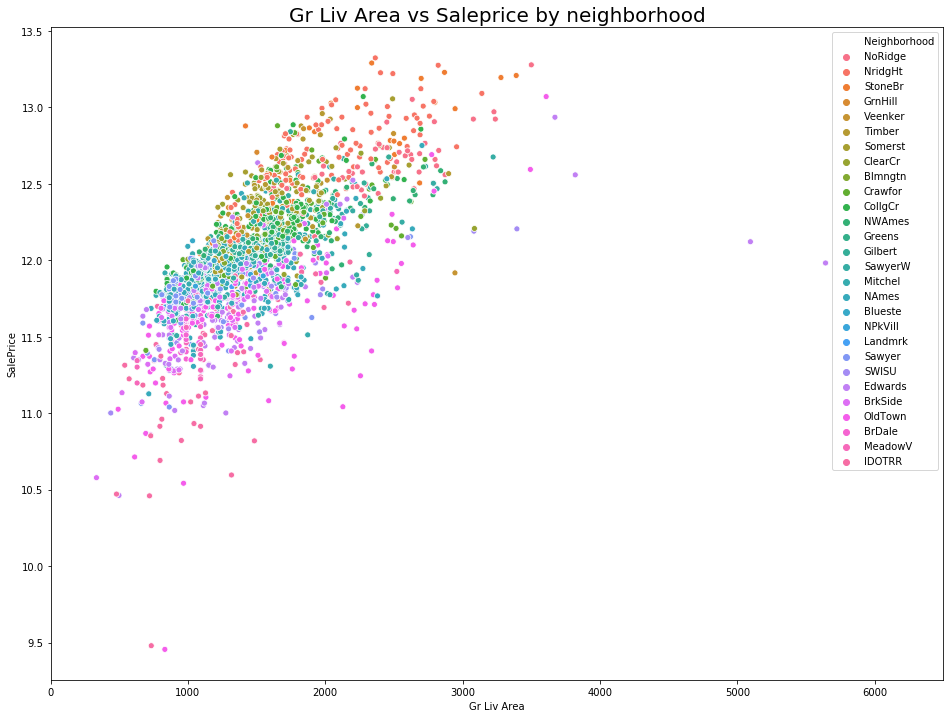

In [13]:
#sorting the neighborhood by mean saleprice
price_by_neighborhood = train.groupby('Neighborhood')['SalePrice'].describe().sort_values('mean',ascending=False)

#Plotting the 'Gr Liv Area' vs 'SalePrice'
#The hue is sorted by the mean neighborhood price
plt.figure(figsize=(16,12))
sns.scatterplot(y='SalePrice', x='Gr Liv Area', hue='Neighborhood',
                hue_order=list(price_by_neighborhood.T.columns),
                data=train).set_xlim(0,6500)
plt.title('Gr Liv Area vs Saleprice by neighborhood', fontsize=20)

In [14]:
#Identifying the outliers
train[train['Gr Liv Area'] > 4000 ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,11.982929
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,12.121875


In [15]:
#Removing the outliers
train.drop([960, 1885], inplace=True)

## Data Cleaning

- Clean column headers to ensure standardisation of snake_case
- Identify missing values and impute the data 
- Convert ordinal variables into ranked variables
- Apply one-hot-encoding for nominal variables

In [16]:
#Cleaning the column headers
train.columns = [col.lower().replace(' ','_') for col in train.columns]

In [17]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.838626


In [18]:
#Identifying the 26 columns with missing data
train.isnull().sum().sort_values(ascending=False).head(30)

pool_qc           2041
misc_feature      1985
alley             1909
fence             1649
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
exterior_2nd         0
exterior_1st         0
roof_matl            0
dtype: int64

Below is a data dictionary outlining the data cleaning that needs to be done for each variable by data type.
Data types have been split further form quantitative and qualitative categorisation using the official data documentation
The order of cleaning will go down the list by Data type

|Feature|Data Type|Data Cleaning|
|---|---|---|
|year_built|Discrete|No change|
|year_remod/add|Discrete|No change|
|bsmt_full bath|Discrete|Missing Data|
|bsmt_half bath|Discrete|Missing Data|
|full_bath|Discrete|No change|
|half_bath|Discrete| No change|
|bedroom|Discrete|No change|
|kitchen|Discrete|No change|
|totrms_abvgrd|Discrete|No change|
|fireplaces|Discrete|No change|
|garage_yr_blt|Discrete|Missing Data|
|garage_cars|Discrete|Missing Data|
|mo_sold|Discrete|one hot encoding|
|yr_sold|Discrete|No change|
|lot_frontage|Continuous|Missing Data|
|lot_area|Continuous|No change|
|mas_vnr_area|Continuous|Missing Data|
|bsmtfin_sf_1|Continuous|Missing Data|
|bsmtfin_sf_2|Continuous|Missing Data|
|bsmt_unf_sf|Continuous|Missing Data| 
|total_bsmt sf|Continuous|Missing Data| 
|1st_flr_sf|Continuous|No change|
|2nd_flr_sf|Continuous|No change|
|low_qual fin sf|Continuous|No change|
|gr_liv_area|Continuous|No change|
|garage_area|Continuous|Missing Data|
|wood_deck_sf|Continuous|No change|
|open_porch_sf|Continuous|No change|
|enclosed_porch|Continuous|No change|
|screen_porch|Continuous|No change|
|pool_area|Continuous|No change|
|misc_val|Continuous|No change|
|saleprice|Continuous|No change|
|pid|nominal|No change|
|ms_subclass|nominal|one hot encoding|
|ms_zoning|nominal|one hot encoding|
|street|nominal|one hot encoding|
|alley|nominal|Missing Data, one hot encoding|
|land contour|nominal|one hot encoding|
|lot_config|nominal|one hot encoding|
|neighborhood|nominal|one hot encoding|
|condition_1|nominal|one hot encoding|
|condition_2|nominal|one hot encoding|
|bldg_type|nominal|one hot encoding|
|house_style|nominal|Change to ordinal|
|roof_style|nominal|one hot encoding|
|roof_matl|nominal|one hot encoding|
|exterior_1st|nominal|one hot encoding|
|exterior_2st|nominal|one hot encoding|
|mas_vnr_type|nominal|Missing Data,one hot encoding|
|foundation|nominal|one hot encoding|
|heating|nominal|one hot encoding|
|central_air|nominal|Change to discrete|
|garage_type|nominal|Missing Data, one hot encoding|
|misc_feature|nominal|Missing Data, one hot encoding|
|sale_type|nominal|one hot encoding|
|lot_shape|ordinal|change to numerical|
|utilities|ordinal|change to numerical|
|land_slope|ordinal|change to numerical|
|overall_qual|ordinal|change to numerical|
|overall_cond|ordinal|change to numerical|
|exter_qual|ordinal|change to numerical|
|exter_cond|ordinal|change to numerical|
|bsmt_qual|ordinal|Missing Data, change to numerical|
|bsmt_cond|ordinal|Missing Data, change to numerical|
|bsmt_exposure|ordinal|Missing Data, change to numerical|
|bsmtfintype_1|ordinal|Missing Data, change to numerical|
|bsmtfintype_2|ordinal|Missing Data, change to numerical| 
|heating_qc|ordinal|change to numerical|
|electrical|ordinal|change to numerical|
|kitchen_qual|ordinal|change to numerical|
|functional|ordinal|change to numerical|
|fireplace_qu|ordinal|Missing Data, change to numerical|
|garage_finish|ordinal|Missing Data, change to numerical|
|garage_qual|ordinal|Missing Data, change to numerical|
|garage_cond|ordinal|Missing Data, change to numerical|
|paved_drive|ordinal|change to numerical|
|pool_qc|ordinal|Missing Data, change to numerical|
|fence|ordinal|Missing Data, change to numerical

## Discrete variables
All discrete varibables will remain unchanged except for missing data

In [19]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.838626


### bsmt_full_bath, bsmt_half_bath

In [20]:
#Function to show unique values
def show_unique_values(data, column):
    print(f'{column} has {data[column].unique().shape[0]} unique values')
    print (data[column].unique())
    print('\n')

#Function to show missing values of that column
def show_missing_values(data, column):
    return data[data[column].isnull() == True].head()

In [21]:
#Finding the different unique values of Bsmt Full Bath
show_unique_values(train,'bsmt_full_bath')

bsmt_full_bath has 5 unique values
[ 0.  1.  2. nan  3.]




In [22]:
#It looks like the missing values in Bsmt Full Bath are coded wrongly, they should be 0 to represent no basement full baths
show_missing_values(train,'bsmt_full_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,12.559191
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,11.277203


In [23]:
#Finding the different unique values of Bsmt Half Bath
show_unique_values(train,'bsmt_half_bath')

bsmt_half_bath has 4 unique values
[ 0.  1. nan  2.]




In [24]:
#It looks like the missing values in Bsmt half Bath are coded wrongly, they should be 0 to represent no basement half baths
show_missing_values(train,'bsmt_half_bath')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,12.559191
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,11.277203


In [25]:
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)
train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)

### garage_yr_blt, garage_cars

In [26]:
# Finding the different unique values of Bsmt Half Bath
show_unique_values(train,'garage_yr_blt')

garage_yr_blt has 101 unique values
[1976. 1997. 1953. 2007. 1957. 1966. 2005. 1959. 1952. 1969. 1971. 1900.
 2000. 2004. 1916. 1963. 1977. 2009. 1968. 1992. 1955. 1961. 1973. 1937.
   nan 2003. 1981. 1931. 1995. 1958. 1965. 2006. 1978. 1954. 1935. 1951.
 1996. 1999. 1920. 1930. 1924. 1960. 1949. 1986. 1956. 1994. 1979. 1964.
 2001. 1972. 1939. 1962. 1927. 1948. 1967. 1993. 2010. 1915. 1987. 1970.
 1988. 1982. 1941. 1984. 1942. 1950. 2002. 1975. 2008. 1974. 1998. 1918.
 1938. 1985. 1923. 1980. 1991. 1946. 1940. 1990. 1896. 1983. 1914. 1945.
 1921. 1925. 1926. 1936. 1932. 1947. 1929. 1910. 1917. 1922. 1934. 1989.
 1928. 2207. 1933. 1895. 1919.]




In [27]:
#The reason why Garage Yr Blt is na is because these houses do not have a garage as Garage Type= NA
#We will get to changing the rest of the garage missing values later
show_missing_values(train,'garage_yr_blt')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,11.691908
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.238489
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,11.898188
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,11.774135
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,11.362103


In [28]:
#Finding the different unique values of Garage Cars
show_unique_values(train,'garage_cars')

garage_cars has 7 unique values
[ 2.  1.  3.  0.  4.  5. nan]




In [29]:
#This row has conflicting data
#Garage type is listed as Detchd but all other columns for garage point to the house having no garage
#We will remove this data point
show_missing_values(train,'garage_cars')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,11.924432


In [30]:
#dropping row 1712
train = train.drop(1712,axis=0)

In [31]:
#Treating missing 
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)

### central_air
Despite being listed as nominal, it is either a Y or N. This can be mapped into 1s and 0s

In [32]:
show_unique_values(train, 'central_air')

central_air has 2 unique values
['Y' 'N']




In [33]:
train['central_air'] = train['central_air'].map({'Y':1, 'N':0})

## Continuous variables

### lot_frontage

In [34]:
#Rows with missing values for Lot Frontage
#Lot Area and Lot Frontage might have some relation
#It would not make sense to impute 0 for the missing lot frontage
show_missing_values(train, 'lot_frontage')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.779129
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,1,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,11.863582
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,1,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,11.630709
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,1,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,12.128111
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,1,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,12.196022


In [35]:
#Mean Lot frontage by neighborhood
train.groupby('neighborhood')['lot_frontage'].mean()

neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    64.511811
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     62.079365
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: lot_frontage, dtype: float64

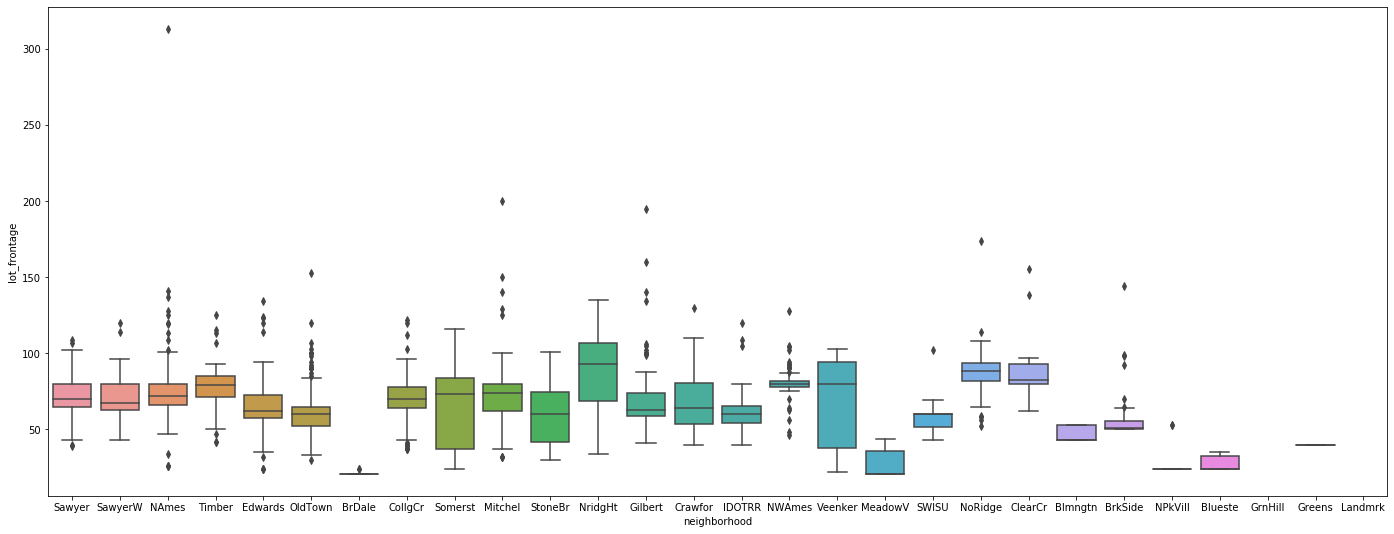

In [36]:
#Visual representation of the distribution of the mean lot frontage by neighborhood
plt.figure(figsize=(24,9))
sns.boxplot(y='lot_frontage', x='neighborhood', data=train)

In [37]:
#Creating a new dataframe for ease of computing
neighbourhood_data = train[['neighborhood', 'lot_frontage', 'lot_area']]

In [38]:
#Checking the dataframe
neighbourhood_data.head()

,neighborhood,lot_frontage,lot_area
0,Sawyer,NaN,13517
1,SawyerW,43.0,11492
2,NAmes,68.0,7922
3,Timber,73.0,9802
4,SawyerW,82.0,14235


In [39]:
neighbourhood_data_mean = round(neighbourhood_data.groupby('neighborhood')['lot_frontage'].mean(),2)

In [40]:
neighbourhood_data_mean_dict = neighbourhood_data_mean.to_dict()

In [41]:
neighbourhood_data_mean_dict

{'Blmngtn': 47.25,
 'Blueste': 27.67,
 'BrDale': 21.32,
 'BrkSide': 56.36,
 'ClearCr': 92.5,
 'CollgCr': 70.75,
 'Crawfor': 69.27,
 'Edwards': 64.51,
 'Gilbert': 72.03,
 'Greens': 40.0,
 'GrnHill': nan,
 'IDOTRR': 62.08,
 'Landmrk': nan,
 'MeadowV': 26.81,
 'Mitchel': 75.48,
 'NAmes': 75.19,
 'NPkVill': 27.62,
 'NWAmes': 80.97,
 'NoRidge': 88.31,
 'NridgHt': 86.29,
 'OldTown': 62.8,
 'SWISU': 58.39,
 'Sawyer': 72.77,
 'SawyerW': 70.49,
 'Somerst': 63.98,
 'StoneBr': 60.06,
 'Timber': 78.59,
 'Veenker': 67.85}

In [42]:
neighbourhood_data['mean'] = neighbourhood_data['neighborhood'].map(neighbourhood_data_mean_dict)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
neighbourhood_data.head()

,neighborhood,lot_frontage,lot_area,mean
0,Sawyer,NaN,13517,72.77
1,SawyerW,43.0,11492,70.49
2,NAmes,68.0,7922,75.19
3,Timber,73.0,9802,78.59
4,SawyerW,82.0,14235,70.49


In [44]:
neighbourhood_data['lot_frontage'] = neighbourhood_data['lot_frontage'].fillna(neighbourhood_data['mean'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
neighbourhood_data.head()

,neighborhood,lot_frontage,lot_area,mean
0,Sawyer,72.77,13517,72.77
1,SawyerW,43.00,11492,70.49
2,NAmes,68.00,7922,75.19
3,Timber,73.00,9802,78.59
4,SawyerW,82.00,14235,70.49


In [46]:
#mapping the mean lot frontage
train['lot_frontage'] = neighbourhood_data['lot_frontage']

In [47]:
train['lot_frontage'] = train['lot_frontage'].fillna(train['lot_frontage'].mean())

### mas_vnr_area

In [48]:
#These missing data are because Mas Vnr Type is none.
#These houses have no masionary veneer
train[train['mas_vnr_area'].isnull() == True].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,1,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,12.748783
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,1,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,13.049793
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,1,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,12.127570
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,1,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,12.323856
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,1,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,11.672064


In [49]:
#Setting missing data to 0
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

### bsmtfin_sf_1, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf

In [50]:
#All these are missing values because this house does not have a basement. Bsmt Qual = NaN
train[train['bsmtfin_sf_1'].isnull() == True].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,1,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,11.277203


In [51]:
#Setting these missing values to 0
train['bsmtfin_sf_1'] = train['bsmtfin_sf_1'].fillna(0)
train['bsmtfin_sf_2'] = train['bsmtfin_sf_2'].fillna(0)
train['bsmt_unf_sf'] = train['bsmt_unf_sf'].fillna(0)
train['total_bsmt_sf'] = train['total_bsmt_sf'].fillna(0)

### garage_area

In [52]:
#This same row was seen previously and has been removed
train[train['garage_area'].isnull() == True].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


## Nomial data
All nominal data will be one hot encoded (except for PID) and have their missing values imputed

### alley

In [53]:
#Missing data for Alley represent no alley access
show_missing_values(train, 'alley')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,72.77,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.779129
1,544,531379050,60,RL,43.00,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,12.301383
2,153,535304180,20,RL,68.00,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,11.599103
3,318,916386060,60,RL,73.00,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,12.066811
4,255,906425045,50,RL,82.00,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.838626


In [54]:
#get_dummies removes the need for cleaning those rows without an alley
train = pd.get_dummies(train, columns=['alley'])

### mas_vnr_type

In [55]:
#Instead of changing the missing values to none, 'None' values will be changed to NaN
#The get dummies function will drop NaN values for us
show_missing_values(train, 'mas_vnr_type')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,alley_Grvl,alley_Pave
22,2393,528142010,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,1,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,12.748783,0,0
41,2383,528110050,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,1,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,13.049793,0,0
86,539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,1,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,12.127570,0,0
212,518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,1,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,12.323856,0,0
276,2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,1,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,11.672064,0,0


In [56]:
#Changing 'None' to np.NaN
train['mas_vnr_type'] = train['mas_vnr_type'].map(lambda x: np.nan if x=='None' else x)

In [57]:
#Creating dummmies
train = pd.get_dummies(train, columns=['mas_vnr_type'])

### garage_type

In [58]:
#No cleaning needed other than changing to dummy variables
show_missing_values(train, 'garage_type')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone
28,2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,0,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,11.691908,0,0,0,0,0
53,330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.238489,0,0,0,0,0
65,2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,1,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,11.898188,0,0,0,0,0
79,2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,1,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,11.774135,0,0,0,0,0
101,2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,1,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,11.362103,0,0,0,0,0


In [59]:
#Creating dummmies
train = pd.get_dummies(train, columns=['garage_type'])

### misc_feature

In [60]:
#No cleaning needed other than changing to dummy variables
train[train['misc_feature'].isnull() == True].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,109,533352170,60,RL,72.77,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.779129,0,0,0,1,0,0,1,0,0,0,0
1,544,531379050,60,RL,43.00,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,12.301383,0,0,0,1,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.00,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,11.599103,0,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,RL,73.00,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,12.066811,0,0,0,0,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.00,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,11.838626,0,0,0,0,0,0,0,0,0,0,1


In [61]:
#Creating dummmies
train = pd.get_dummies(train, columns=['misc_feature'])

### Rest of the nominal columns

In [62]:
train = pd.get_dummies(train, columns=['ms_subclass',
                                       'ms_zoning',
                                       'street',
                                       'land_contour',
                                       'lot_config',
                                       'condition_1',
                                       'condition_2',
                                       'bldg_type',                                       
                                       'roof_style',
                                       'roof_matl',
                                       'exterior_1st',
                                       'exterior_2nd',
                                       'foundation',
                                       'heating',                                       
                                       'sale_type'])

In [63]:
#checking the dummy variables
train.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,72.77,13517,IR1,AllPub,Gtl,Sawyer,2Story,6,8,1976,2005,289.0,Gd,TA,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,0,3,2010,11.779129,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.00,11492,IR1,AllPub,Gtl,SawyerW,2Story,7,5,1996,1997,132.0,Gd,TA,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,0,4,2009,12.301383,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [64]:
train.shape

(2048, 194)

### Ordinal
All ordinal data types will be changed to numerical data and have its missing data imputed:
- Bsmt Qual		Missing Data, Change to numerical
- Bsmt Cond		Missing Data, Change to numerical
- Bsmt Exposure		Missing Data, Change to numerical
- BsmtFin Type 1		Missing Data, Change to numerical
- BsmtFinType 2		Missing Data, Change to numerical
- Fireplace Qu		Missing Data, Change to numerical
- Garage Finish		Missing Data, Change to numerical
- Garage Qual		Missing Data, Change to numerical
- Garage Cond		Missing Data, Change to numerical
- Pool QC		Missing Data, Change to numerical
- Fence		Missing Data, Change to numerical


### bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2

In [65]:
#These missing values for Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2
#represent the house having no basement
show_missing_values(train, 'bsmt_qual')

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
12,807,906226060,120.00,26400,Reg,AllPub,Gtl,SawyerW,2Story,5,7,1880,2007,0.0,Gd,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Ex,1,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,11.782953,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
93,811,906226100,64.00,7018,Reg,AllPub,Gtl,SawyerW,1Story,5,5,1979,1979,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,1,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,0,6,2009,11.685685,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [66]:
#Checking the different types of values
show_unique_values(train, 'bsmt_qual')
show_unique_values(train, 'bsmt_cond')
show_unique_values(train, 'bsmt_exposure')
show_unique_values(train, 'bsmtfin_type_1')
show_unique_values(train, 'bsmtfin_type_2')

bsmt_qual has 6 unique values
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']


bsmt_cond has 6 unique values
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']


bsmt_exposure has 5 unique values
['No' 'Gd' 'Av' nan 'Mn']


bsmtfin_type_1 has 7 unique values
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']


bsmtfin_type_2 has 7 unique values
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']




In [67]:
#Changing the ordinal data to numeric
train['bsmt_qual'] = train['bsmt_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['bsmt_cond'] = train['bsmt_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['bsmt_exposure'] = train['bsmt_exposure'].map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

### fireplace_qu

In [68]:
#Missing data here represents no fireplace
show_missing_values(train, 'fireplace_qu')

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,72.77,13517,IR1,AllPub,Gtl,Sawyer,2Story,6,8,1976,2005,289.0,Gd,TA,3,3,1,6,533.0,1,0.0,192.0,725.0,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,0,3,2010,11.779129,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,153,535304180,68.00,7922,Reg,AllPub,Gtl,NAmes,1Story,5,7,1953,2007,0.0,TA,Gd,3,3,1,6,731.0,1,0.0,326.0,1057.0,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,0,1,2010,11.599103,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,

In [69]:
#Changing the ordinal data to numeric
train['fireplace_qu'] = train['fireplace_qu'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

### garage_finish, garage_qual, garage_cond

In [70]:
#Missing data here represents no garage
show_missing_values(train ,'garage_finish')

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
28,2243,911103060,75.0,8250,Reg,AllPub,Gtl,IDOTRR,2Story,5,6,1895,2006,0.0,TA,Gd,3,3,1,1,0.0,1,0.0,957.0,957.0,Fa,0,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,0,0.0,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,0,6,2007,11.691908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
53,330,923226250,21.0,1476,Reg,AllPub,Gtl,MeadowV,2Story,4,7,1970,1970,0.0,TA,TA,3,3,1,6,176.0,1,0.0,370.0,546.0,Ex,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,0,0.0,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,0,3,2010,11.238489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,

In [71]:
#Checking the different types of values
show_unique_values(train, 'garage_finish')
show_unique_values(train, 'garage_qual')
show_unique_values(train, 'garage_cond')

garage_finish has 4 unique values
['RFn' 'Unf' 'Fin' nan]


garage_qual has 6 unique values
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']


garage_cond has 6 unique values
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']




In [72]:
#Changing the ordinal data to numeric
train['garage_finish'] = train['garage_finish'].map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
train['garage_qual'] = train['garage_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['garage_cond'] = train['garage_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

### pool_qc

In [73]:
#Pool QC : Pool Quality
show_unique_values(train, 'pool_qc')

pool_qc has 5 unique values
[nan 'Fa' 'Gd' 'Ex' 'TA']




In [74]:
#Filling in Missing Data and changing from ordinal into numerical
train['pool_qc'] = train['pool_qc'].map({np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})

### Fence

In [75]:
show_unique_values(train, 'fence')

fence has 5 unique values
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']




In [76]:
#Filling in Missing Data and changing from ordinal into numerical
train['fence'] = train['fence'].map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})

|---|---|---|
|---|---|---|
|Lot Shape|Ordinal|Change to numerical|
|Utilities|Ordinal|Change to numerical|
|Land Slope|Ordinal|Change to numerical|
|Overall Qual|Ordinal|Change to numerical|
|Overall Cond|Ordinal|Change to numerical|
|Exter Qual|Ordinal|Change to numerical|		
|Exter Cond|Ordinal|Change to numerical|
|Heating QC|Ordinal|Change to numerical|
|Electrical|Ordinal|Change to numerical|
|Kitchen Qual|Ordinal|Change to numerical|
|Functional|Ordinal|Change to numerical|
|Paved Drive|Ordinal|Change to numerical|

### Rest of the ordinal columns

In [77]:
#Checking the different types of values.
#Making sure that our training data matches the data dictionary
show_unique_values(train,'lot_shape')
show_unique_values(train,'utilities')
show_unique_values(train,'land_slope')
show_unique_values(train,'overall_qual')
show_unique_values(train,'overall_cond')
show_unique_values(train, 'exter_qual')
show_unique_values(train, 'exter_cond')
show_unique_values(train, 'heating_qc')
show_unique_values(train, 'electrical')
show_unique_values(train, 'kitchen_qual')
show_unique_values(train, 'functional')
show_unique_values(train, 'paved_drive')

lot_shape has 4 unique values
['IR1' 'Reg' 'IR2' 'IR3']


utilities has 3 unique values
['AllPub' 'NoSeWa' 'NoSewr']


land_slope has 3 unique values
['Gtl' 'Sev' 'Mod']


overall_qual has 10 unique values
[ 6  7  5  8 10  4  9  3  2  1]


overall_cond has 9 unique values
[8 5 7 6 3 9 2 4 1]


exter_qual has 4 unique values
['Gd' 'TA' 'Ex' 'Fa']


exter_cond has 5 unique values
['TA' 'Gd' 'Fa' 'Ex' 'Po']


heating_qc has 5 unique values
['Ex' 'TA' 'Gd' 'Fa' 'Po']


electrical has 5 unique values
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


kitchen_qual has 4 unique values
['Gd' 'TA' 'Fa' 'Ex']


functional has 8 unique values
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']


paved_drive has 3 unique values
['Y' 'N' 'P']




In [78]:
#Changing the ordinal data to numeric
train['lot_shape'] = train['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})

#Data dictionary lists ELO as the lowest ordinal option but since we do not have it in our train data
#It will be leftout
train['utilities'] = train['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})

#Assume severe slope is an unattractive attribute
train['land_slope'] = train['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
train['exter_qual'] = train['exter_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['exter_cond'] = train['exter_cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['heating_qc'] = train['heating_qc'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['electrical'] = train['electrical'].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
train['kitchen_qual'] = train['kitchen_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#Data dictionary states that 'Functional' is assume typical unless deductions made
#Therefore, a negative scale is used starting at 0
train['functional'] = train['functional'].map({'Typ':0, 'Min1': -1, 'Min2': -2, 'Mod':-3,
                                               'Maj1':-4, 'Maj2':-5, 'Sev':-6, 'Sal':-7})
train['paved_drive'] = train['paved_drive'].map({'N':0, 'P':1, 'Y':2})

### house_style
House style is recorded as a nominal variable but with additional research, i am able to assign numerical values to the housing style.

The assumption made is that split level houses are generally 3 stories or higher, split foyer houses are assumed to be 2 stories

source: https://www.harrymoore.com/2019/10/02/split-level-vs-split-foyer/

In [79]:
show_unique_values(train, 'house_style')

house_style has 8 unique values
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']




In [80]:
train['house_style'] = train['house_style'].map({'1Story':1, '1.5Unf':1.25, '1.5Fin':1.5, 
                                                 '2Story':2, '2.5Unf':2.25, '2.5Fin':2.5,
                                                'SFoyer':2, 'SLvl':3})

In [81]:
train.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,alley_Grvl,alley_Pave,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,72.77,13517,3,3,3,Sawyer,2.0,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,1,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,0,0,0,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,0,3,2010,11.779129,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.00,11492,3,3,3,SawyerW,2.0,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,1,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,0,1,3,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,0,4,2009,12.301383,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,153,535304180,68.00,7922,4,3,3,NAmes

In [82]:
#Check through of the data cleaning process
#Making usre that there are no more missing values
train.isnull().sum().sort_values(ascending=False).head(10)

sale_type_WD            0
garage_cond             0
garage_type_BuiltIn     0
garage_type_Basment     0
garage_type_Attchd      0
garage_type_2Types      0
mas_vnr_type_Stone      0
mas_vnr_type_BrkFace    0
mas_vnr_type_BrkCmn     0
alley_Pave              0
dtype: int64

In [83]:
#Dummy variable column name change to lower case
train.columns = [col.lower() for col in train.columns]

## Cleaning Test Data

In [84]:
test.isnull().sum().sort_values(ascending=False).head(20)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
dtype: int64

In [85]:
#Cleaning the test data using the mean/ methods used for cleaning the training data
#Cleaning the column headers
test.columns = [col.lower().replace(' ','_') for col in test.columns]

#Discrete
test['bsmt_full_bath'] = test['bsmt_full_bath'].fillna(0)
test['bsmt_half_bath'] = test['bsmt_half_bath'].fillna(0)
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0)
test['central_air'] = test['central_air'].map({'Y':1, 'N':0})

#Continuous
test['lot_frontage'] = neighbourhood_data['lot_frontage']
test['lot_frontage'] = test['lot_frontage'].fillna(test['lot_frontage'].mean())

test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)
test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].fillna(0)
test['bsmtfin_sf_2'] = test['bsmtfin_sf_2'].fillna(0)
test['bsmt_unf_sf'] = test['bsmt_unf_sf'].fillna(0)
test['total_bsmt_sf'] = test['total_bsmt_sf'].fillna(0)

#Nominal
test = pd.get_dummies(test, columns=['mas_vnr_type'])
test = pd.get_dummies(test, columns=['alley'])
test = pd.get_dummies(test, columns=['garage_type'])
test = pd.get_dummies(test, columns=['misc_feature'])
test = pd.get_dummies(test, columns=['ms_subclass',
                                       'ms_zoning',
                                       'street',
                                       'land_contour',
                                       'lot_config',
                                       'condition_1',
                                       'condition_2',
                                       'bldg_type',                                       
                                       'roof_style',
                                       'roof_matl',
                                       'exterior_1st',
                                       'exterior_2nd',
                                       'foundation',
                                       'heating',                                       
                                       'sale_type'])

#Ordinal
test['bsmt_qual'] = test['bsmt_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['bsmt_cond'] = test['bsmt_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['bsmt_exposure'] = test['bsmt_exposure'].map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['fireplace_qu'] = test['fireplace_qu'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['garage_finish'] = test['garage_finish'].map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
test['garage_qual'] = test['garage_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['garage_cond'] = test['garage_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['pool_qc'] = test['pool_qc'].map({np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})
test['fence'] = test['fence'].map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})

test['lot_shape'] = test['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
test['utilities'] = test['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})

test['land_slope'] = test['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
test['exter_qual'] = test['exter_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['exter_cond'] = test['exter_cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['heating_qc'] = test['heating_qc'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['electrical'] = test['electrical'].map({np.nan:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
test['kitchen_qual'] = test['kitchen_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

test['functional'] = test['functional'].map({'Typ':0, 'Min1': -1, 'Min2': -2, 'Mod':-3,
                                               'Maj1':-4, 'Maj2':-5, 'Sev':-6, 'Sal':-7})
test['paved_drive'] = test['paved_drive'].map({'N':0, 'P':1, 'Y':2})

test['house_style'] = test['house_style'].map({'1Story':1, '1.5Unf':1.25, '1.5Fin':1.5, 
                                                 '2Story':2, '2.5Unf':2.25, '2.5Fin':2.5,
                                                'SFoyer':2, 'SLvl':3})

#Dummy variable column name change to lower case
test.columns = [col.lower() for col in test.columns]

In [86]:
#Checcking if there are any missing values left in teh test data
test.isnull().sum().sort_values(ascending=False).head()

sale_type_wd          0
misc_val              0
alley_pave            0
alley_grvl            0
mas_vnr_type_stone    0
dtype: int64

## Exploratory Visualizations

#### Numerical, Discrete and Continuous variables

In [87]:
#Looking for the numerical, discrete and continuous variables only
train.columns.get_loc('yr_sold')

60

In [88]:
train.iloc[:,:60].describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,2048.0,1.473304e+03,8.442856e+02,1.0,7.527500e+02,1480.5,2197.5,2930.0
pid,2048.0,7.133040e+08,1.886818e+08,526301100.0,5.284581e+08,535453155.0,907175327.5,924152030.0
lot_frontage,2048.0,6.948747e+01,2.098471e+01,21.0,6.000000e+01,70.0,80.0,313.0
lot_area,2048.0,1.002515e+04,6.610091e+03,1300.0,7.500000e+03,9417.5,11503.0,159000.0
lot_shape,2048.0,3.597168e+00,5.637925e-01,1.0,3.000000e+00,4.0,4.0,4.0


In [89]:
#We need to identify the distributions of each varaible
#Variables with little to no variance will not be a usefull indicator on the price of a house
def subplot_histograms(dataframe, list_of_columns):
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16,52), sharey=True) 
    plt.subplots_adjust(hspace=0.6)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        
        #Histogram plot
        ax[i].hist(dataframe[column], bins=20, alpha=0.5)
        
        #Setting the mean of each distribution
        ax[i].axvline(np.mean(dataframe[column]), alpha=1.6)
        bottom, top = plt.ylim()
        ax[i].text(x=np.mean(dataframe[column]),y=1000 ,s=f'Mean: {round(np.mean(dataframe[column]))}',
                   horizontalalignment='center', verticalalignment='center')
        #Setting Title
        ax[i].set_title(column,fontsize=18)
    
        #Setting xlabel
        ax[i].set_xlabel(column,fontsize=12)

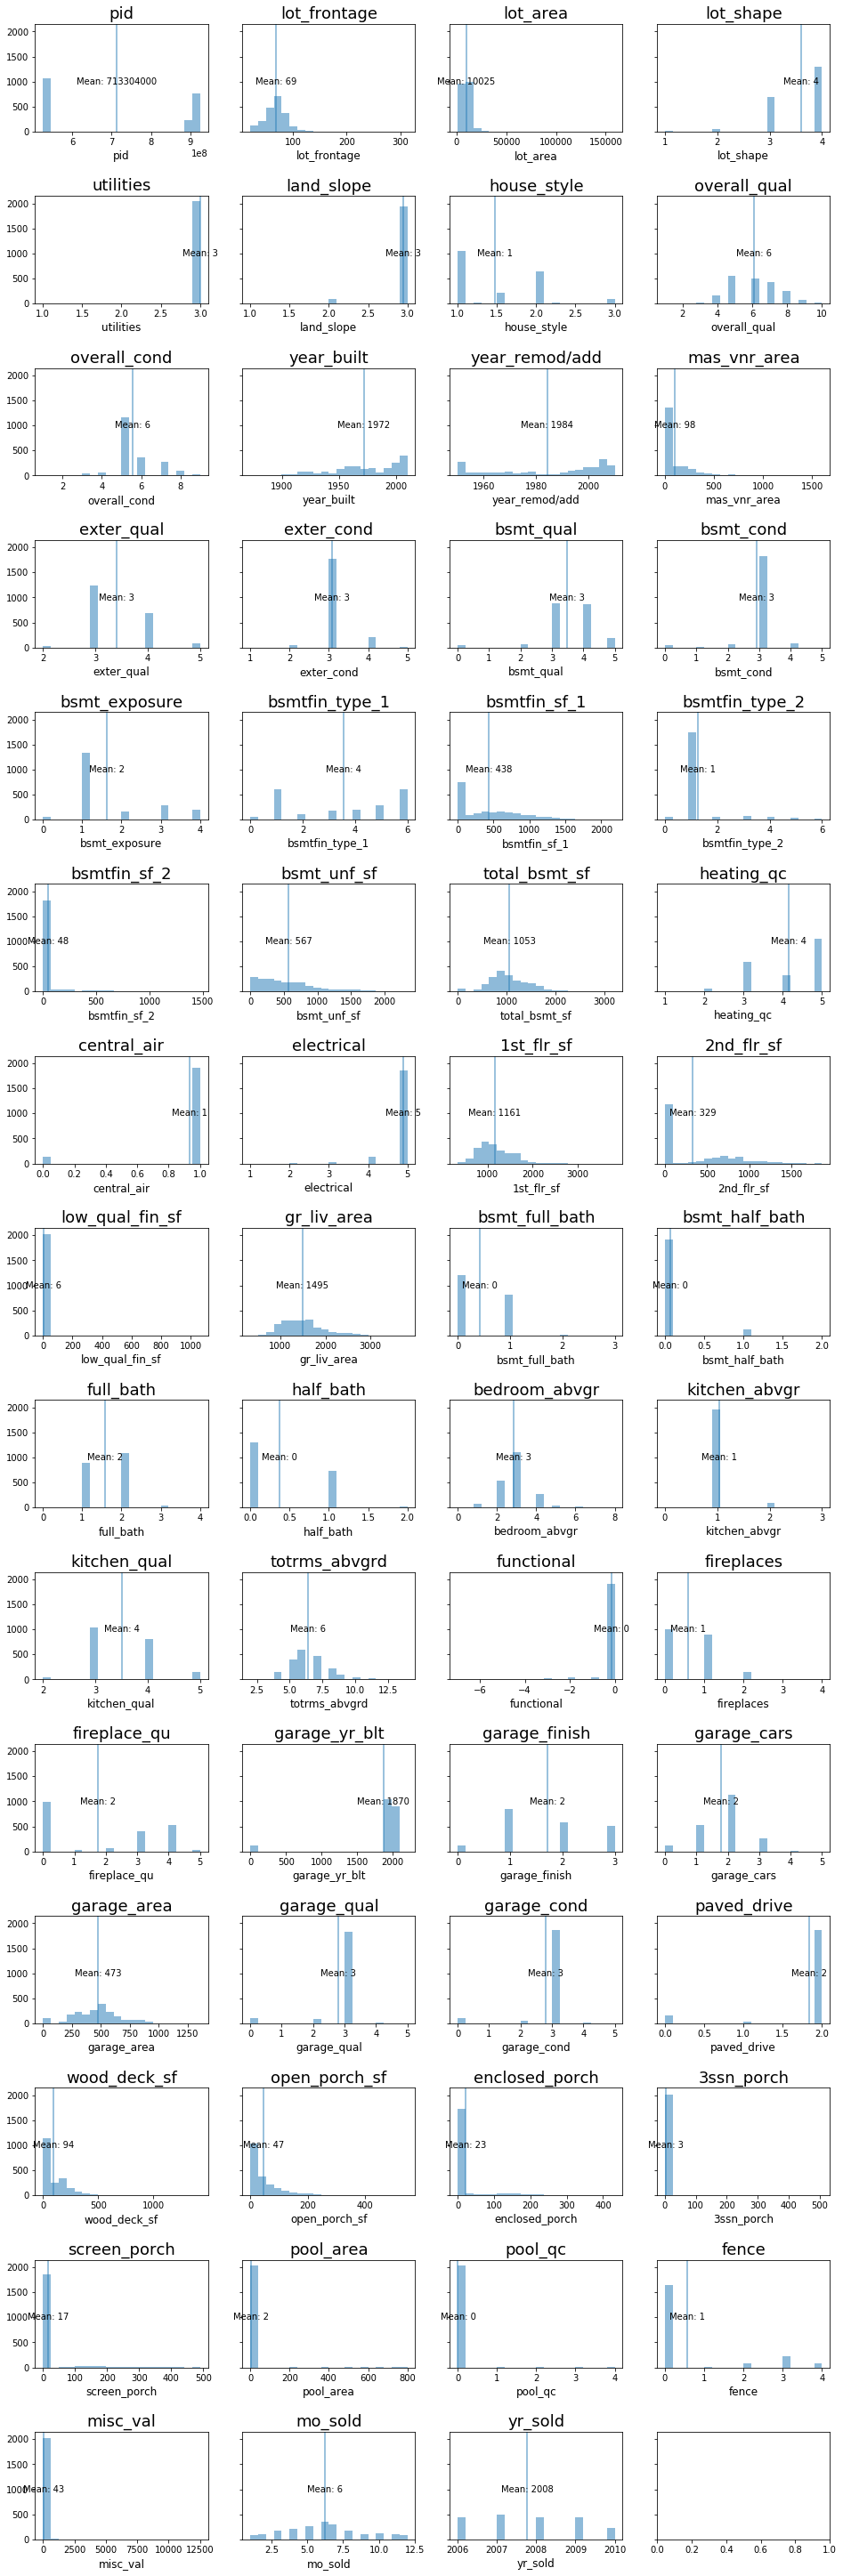

In [90]:
#Plotting the histograms
subplot_histograms(train, list(train.iloc[:,1:61].drop('neighborhood', axis=1).columns))

### Features to drop
These features will be drop from the linear regression model for having little to no variance:
- utilities
- land_slope
- mas_vnr_area
- exter_cond
- bsmt_cond
- bsmtfin_type_2
- bsmtfin_sf_2
- electrical
- kitchen_abvgr
- funtional
- garage_qual
- garage_cond
- paved_drive
- enclosed_porch
- 3ssn_porch
- screen_porch
- pool_area
- pool_qc
- fence
- misc_val
- central_air

#### Categorical variables

The categorical variable elimination is based off mean saleprice and variance (those that have the dummy varialbe vs those that do not)

In [91]:
#function boxplot:
def subplot_boxplots(dataframe, list_of_columns):
     # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/5)) 
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=5, figsize=(16,24), sharey=True) 
    plt.subplots_adjust(hspace=0.6)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        #plotting a boxplot
        sns.boxplot(x=dataframe[column], y=dataframe['saleprice'], ax=ax[i])
        #setting y label
        ax[i].set_ylabel('saleprice',fontsize=13)
        #Setting sample size
        

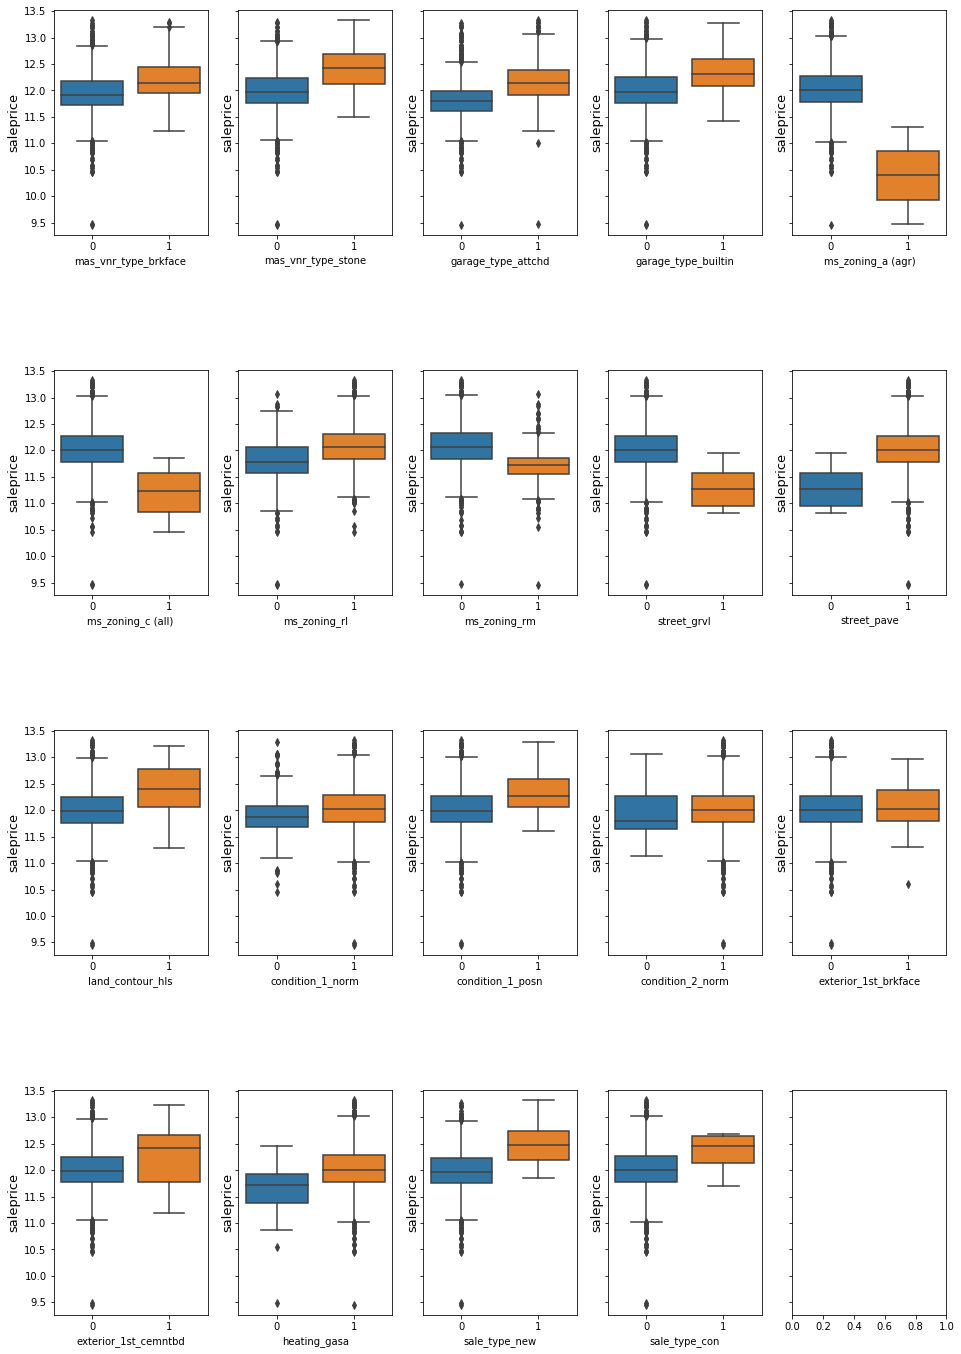

In [92]:
#Looking through the mulitple dummy varaibles
#As it is not practical to show all 200 dummy variables in boxplots
#Those selected here are dummy variables with different mean and have variance
dummy_varaibles_chosen = ['mas_vnr_type_brkface','mas_vnr_type_stone','garage_type_attchd','garage_type_builtin',
                         'ms_zoning_a (agr)','ms_zoning_c (all)',
                         'ms_zoning_rl','ms_zoning_rm','street_grvl','street_pave','land_contour_hls','condition_1_norm',
                         'condition_1_posn','condition_2_norm','exterior_1st_brkface','exterior_1st_cemntbd',
                         'heating_gasa','sale_type_new','sale_type_con']
subplot_boxplots(train, dummy_varaibles_chosen)

In [93]:
#storing the dummy variables to be removed:
remove_dummy = []

for x in list(train.iloc[:,62:].columns):
    if x not in dummy_varaibles_chosen:
        remove_dummy.append(x)
        
remove_dummy[:10]

['alley_grvl',
 'alley_pave',
 'mas_vnr_type_brkcmn',
 'garage_type_2types',
 'garage_type_basment',
 'garage_type_carport',
 'garage_type_detchd',
 'misc_feature_gar2',
 'misc_feature_othr',
 'misc_feature_shed']

## Feature Engineering

### Combination of features
Looking into the official data documentation, some varaibles are found to be components of another. Having variables that are too granular will not be useful in regressing housing prices.

New features are created by taking a summation of existing ones

Because of the new features created we can drop the comprising feature components

#### total_baths

In [94]:
#Summation of all the baths in the house
train['total_baths'] = (train['bsmt_full_bath'] + train['bsmt_half_bath']*0.5 + train['full_bath'] + train['half_bath']*0.5)

#### total_porch_sf

In [95]:
#Total porch area is made by adding all the components of the porch space
train['total_porch_sf'] = (train['wood_deck_sf'] + train['open_porch_sf'] + train['enclosed_porch']
                           + train['3ssn_porch'] + train['screen_porch'])

#### total_sf

In [96]:
#Total squarefoot area is made by adding total basement and total living area
train['total_sf'] = train['total_bsmt_sf'] + train['gr_liv_area']

#### neighboorhood

As mentioned under the Exploratory Data Analysis section, there seems to be some relation between saleprice and the neighborhood, as the adage goes, its all about **location, location, location**. Further feature engineering will be done.

8 different clusters can be found by plotting the mean saleprice of each neighborhood:
- IDOTRR, MeadowV, BrDale
- OldTown, BrkSide, Edwards
- SWISU, Sawyer,Landmrk, NPkVill, Blueste, NAmes
- Mitchel
- SawyerW, Gilbert, Greens, NWAmes, CollgCr, Crawfor, Blmngtn
- ClearCr, Somerst, Timber, Veenker
- GrnHill
- StoneBr, NridgHt, NoRidge

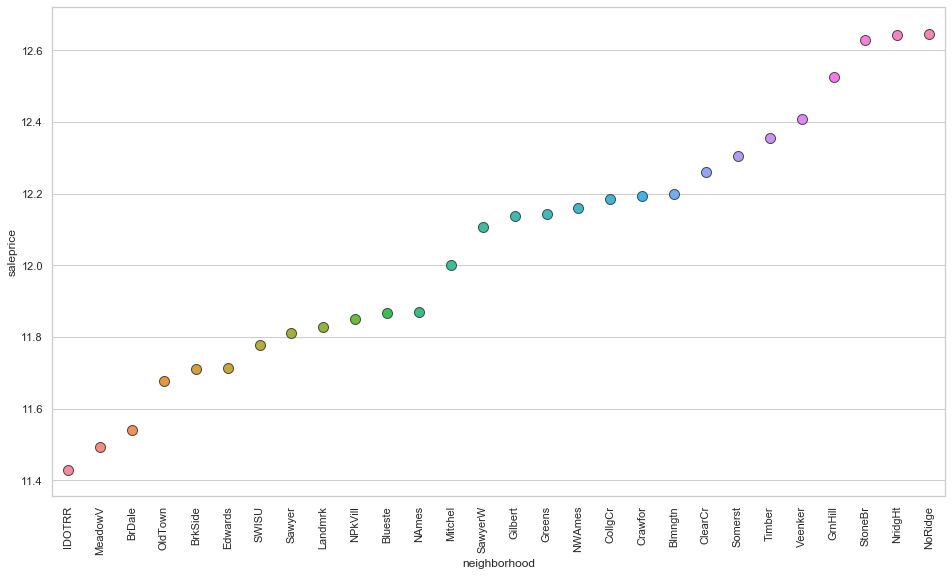

In [97]:
#Plotting the mean saleprice of each neighborhood
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.swarmplot(y=train.groupby('neighborhood')['saleprice'].mean().sort_values(), 
              x=train.groupby('neighborhood')['saleprice'].mean().sort_values().index,
              size=10,linewidth=1)
plt.xticks(rotation=90);

In [98]:
#transforming neighborhood into an ordinal category:
train['neighborhood'] = train['neighborhood'].map({'IDOTRR':1, 'MeadowV':1, 'BrDale':1,
                                                  'OldTown':2, 'BrkSide':2, 'Edwards':2,
                                                  'SWISU':3, 'Sawyer':3,'Landmrk':3, 'NPkVill':3, 'Blueste':3, 'NAmes':3,
                                                  'Mitchel':4,
                                                  'SawyerW':5, 'Gilbert':5, 'Greens':5, 'NWAmes':5, 
                                                   'CollgCr':5, 'Crawfor':5, 'Blmngtn':5,
                                                  'ClearCr':6, 'Somerst':6, 'Timber':6, 'Veenker':6,
                                                   'GrnHill':7,
                                                   'StoneBr':8, 'NridgHt':8, 'NoRidge':8})

In [99]:
#Feature engineering for the training data as well
test['total_baths'] = test['bsmt_full_bath'] + test['bsmt_half_bath']*0.5 + test['full_bath'] + test['half_bath']*0.5

test['total_porch_sf'] = (test['wood_deck_sf'] + test['open_porch_sf'] + test['enclosed_porch']
                           + test['3ssn_porch'] + test['screen_porch'])

test['total_sf'] = test['total_bsmt_sf'] + test['gr_liv_area']

test['neighborhood'] = test['neighborhood'].map({'IDOTRR':1, 'MeadowV':1, 'BrDale':1,
                                                  'OldTown':2, 'BrkSide':2, 'Edwards':2,
                                                  'SWISU':3, 'Sawyer':3,'Landmrk':3, 'NPkVill':3, 'Blueste':3, 'NAmes':3,
                                                  'Mitchel':4,
                                                  'SawyerW':5, 'Gilbert':5, 'Greens':5, 'NWAmes':5, 
                                                   'CollgCr':5, 'Crawfor':5, 'Blmngtn':5,
                                                  'ClearCr':6, 'Somerst':6, 'Timber':6, 'Veenker':6,
                                                   'GrnHill':7,
                                                   'StoneBr':8, 'NridgHt':8, 'NoRidge':8})

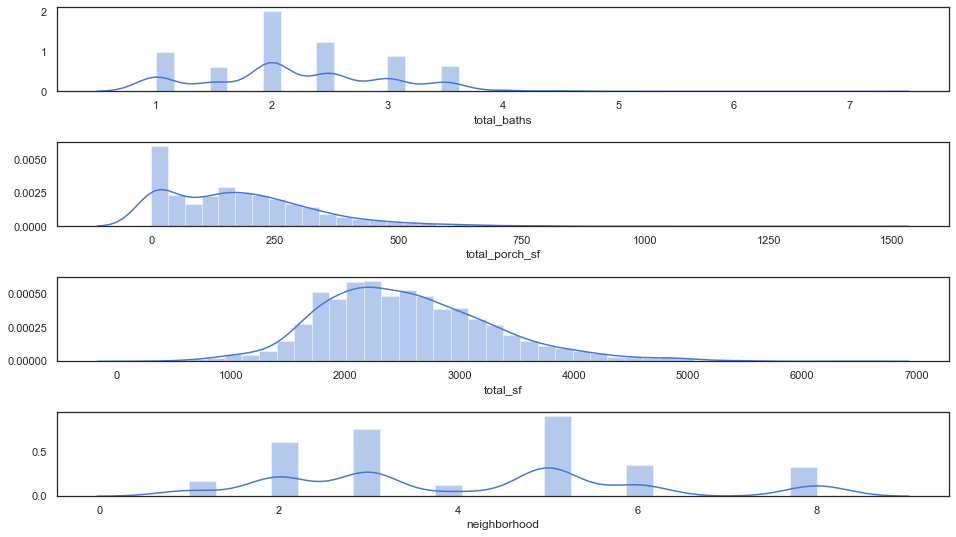

In [100]:
#Checking the distribution of these newly created variables

sns.set(style="white", palette="muted", color_codes=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,9))
plt.subplots_adjust(hspace=0.6)
sns.distplot(train['total_baths'], ax=ax1)
sns.distplot(train['total_porch_sf'], ax=ax2)
sns.distplot(train['total_sf'], ax=ax3)
sns.distplot(train['neighborhood'], ax=ax4)

In [101]:
#Keeping track of all the numerical/ discrete and continuous columns needed to be dropped
columns_to_drop=['utilities', 'land_slope', 'mas_vnr_area', 'exter_cond',
                 'bsmt_cond', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'electrical',
                 'kitchen_abvgr','functional','garage_qual','garage_cond',
                 'paved_drive','enclosed_porch','3ssn_porch','screen_porch',
                 'pool_area','pool_qc','fence','misc_val','central_air', 'bsmt_full_bath',
                 'bsmt_half_bath','full_bath','half_bath','wood_deck_sf',
                 'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                 '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area',
                 'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf'] + remove_dummy

In [102]:
train.drop(columns_to_drop, axis=1, inplace=True)

In [103]:
#Ignoring those variables that are not present in the test dataset
test.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [104]:
train.head()

,id,pid,lot_frontage,lot_area,lot_shape,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,bsmt_qual,bsmt_exposure,bsmtfin_type_1,heating_qc,bedroom_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,mo_sold,yr_sold,saleprice,mas_vnr_type_brkface,mas_vnr_type_stone,garage_type_attchd,garage_type_builtin,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_rl,ms_zoning_rm,street_grvl,street_pave,land_contour_hls,condition_1_norm,condition_1_posn,condition_2_norm,exterior_1st_brkface,exterior_1st_cemntbd,heating_gasa,sale_type_con,sale_type_new,total_baths,total_porch_sf,total_sf
0,109,533352170,72.77,13517,3,3,2.0,6,8,1976,2005,4,3,1,6,5,3,4,6,0,0,1976.0,2,2.0,475.0,3,2010,11.779129,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,2.5,44,2204.0
1,544,531379050,43.00,11492,3,5,2.0,7,5,1996,1997,4,4,1,6,5,4,4,8,1,3,1997.0,2,2.0,559.0,4,2009,12.301383,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,3.5,74,3035.0
2,153,535304180,68.00,7922,4,3,1.0,5,7,1953,2007,3,3,1,6,3,3,4,5,0,0,1953.0,1,1.0,246.0,1,2010,11.599103,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.0,52,2114.0
3,318,916386060,73.00,9802,4,6,2.0,5,5,2006,2007,3,4,1,1,4,3,3,7,0,0,2007.0,3,2.0,400.0,4,2010,12.066811,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.5,100,1828.0
4,255,906425045,82.00,14235,3,5,1.5,6,8,1900,1993,3,2,1,1,3,3,3,6,0,0,1957.0,1,2.0,484.0,3,2010,11.838626,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.0,59,2121.0


In [105]:
train.iloc[:,28:-2].head()

,mas_vnr_type_brkface,mas_vnr_type_stone,garage_type_attchd,garage_type_builtin,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_rl,ms_zoning_rm,street_grvl,street_pave,land_contour_hls,condition_1_norm,condition_1_posn,condition_2_norm,exterior_1st_brkface,exterior_1st_cemntbd,heating_gasa,sale_type_con,sale_type_new,total_baths
0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,2.5
1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,3.5
2,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.0
3,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.5
4,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,2.0


In [106]:
#There are 184 dummy variables
train.iloc[:,28:-2].head().shape

(5, 20)

In [107]:
train_num = pd.merge(train.iloc[:,:28], train.iloc[:,-2:], how='outer', left_index=True, right_index=True)

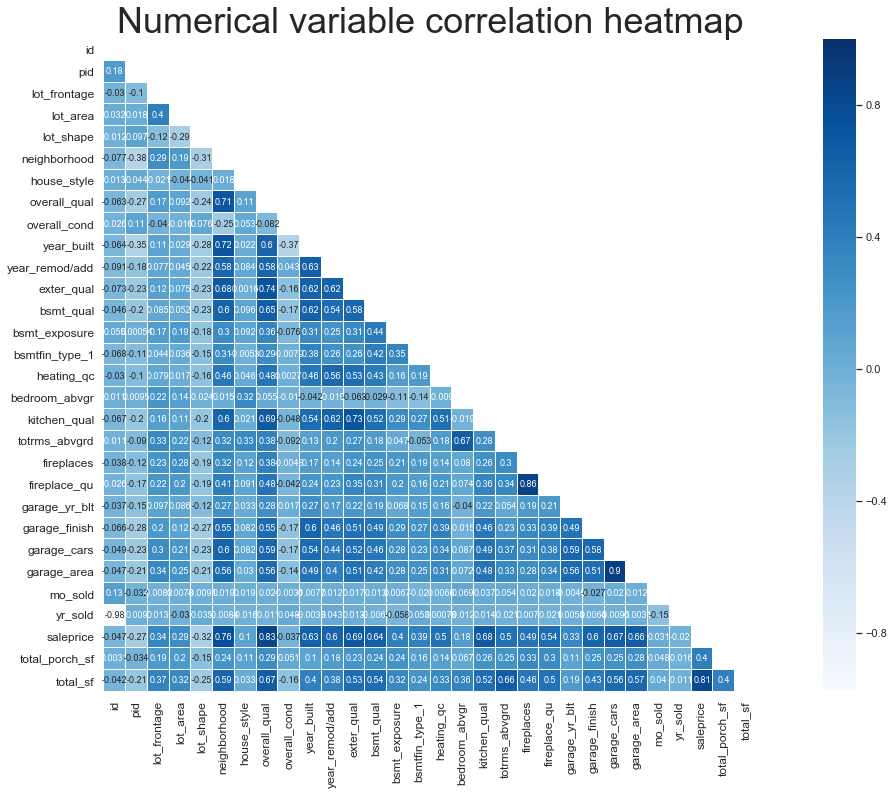

In [108]:
#A correlation heatmap will be able to tell us if there are variables which are highly collinear.
#One option is to remove them manually and the other one is to let 
#Figure size
plt.figure(figsize=(24,12))

#Masking and return the indices for the upper-triangle of arr
mask = np.zeros_like(train_num.corr())
mask[np.triu_indices_from(mask)] = True

#Plotting the heatmap
ax = sns.heatmap(train_num.corr(),square=True, annot=True,annot_kws={'size':9}, mask=mask, cmap='Blues', linewidth=0.05)

#Setting x and y labelsizes
ax.tick_params(labelsize = 12)

#Setting Heatmap title
ax.set_title('Numerical variable correlation heatmap', fontsize=36)

#Extra code needed as top and bottom rows get cut off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Removing low correlation and collinear variables


Low correlation to saleprice and collinear variables will be removed from the features list.
Additionally, as linear regression is an iterative process, variables with a higher alpha lasso coefficient will remain.

In [109]:
drop_collinear=['id',
                'pid',
                'fireplaces',
               'garage_area',
               'exter_qual',
               'kitchen_qual',
                'condition_2_norm',
                'ms_zoning_rl',
                'garage_type_attchd',
                'yr_sold',
                'exterior_1st_cemntbd',
                'mo_sold',
                'bedroom_abvgr',
                'bsmt_qual',
                'house_style',
                'mas_vnr_type_brkface',
               'street_pave',
               'overall_cond',
               'exterior_1st_brkface',
               'sale_type_con',
                'year_built',
                              ]

In [110]:
train.drop(drop_collinear, axis=1, inplace=True)

In [111]:
test.drop(drop_collinear, axis=1, inplace=True, errors='ignore')

### Polynomial feature engineering - Not added to model
experimenting with different polynomial features:
- overall_qual_total_sf = overall_qual * total_sf
- overall_qual_neighborhood = overall_qual * neighborhood
- overall_qual_total_sf_neighborhood = overall_qual * total_sf * neighborhood

These were a few of the features that i tested on the model. using just 'overall_qual_total_sf', my public kaggle score improved but it greatly decreased the private score. Therefore, it will not be included in the model

In [112]:
poly_testdf = train[['saleprice', 'overall_qual', 'total_sf', 'neighborhood']]

poly_testdf['overall_qual_total_sf'] = poly_testdf['overall_qual'] * poly_testdf['total_sf']
poly_testdf['overall_qual_neighborhood'] = poly_testdf['overall_qual'] * poly_testdf['neighborhood']
poly_testdf['total_sf_neighborhood'] = poly_testdf['total_sf'] * poly_testdf['neighborhood']
poly_testdf['overall_qual_total_sf_neighborhood'] = (poly_testdf['overall_qual'] * 
                                                     poly_testdf['total_sf'] * 
                                                     poly_testdf['neighborhood'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [113]:
def subplot_scatter (dataframe, list_of_columns):
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,9), sharey=True) 
    plt.subplots_adjust(hspace=0.6)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        
        #Scatter plot
        sns.scatterplot(y='saleprice', x= column, data=dataframe, ax=ax[i])
        
        #Setting the mean of each distribution

        #Setting Title
        ax[i].set_title(column,fontsize=18)
    
        #Setting xlabel
        ax[i].set_xlabel(column,fontsize=12)

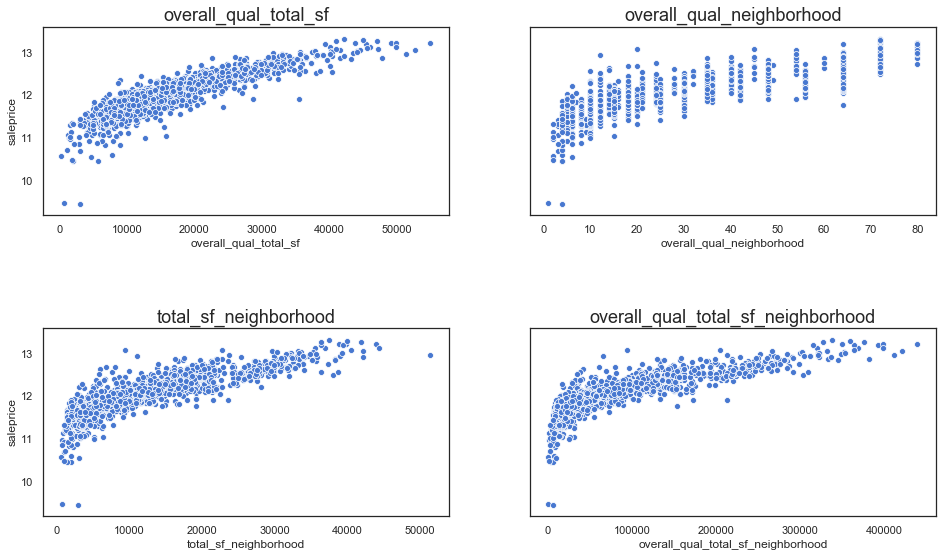

In [114]:
# overall_qual_total_sf seems to have the most linear relationship
# The other 2 scatterplots having a logarithmic relation
subplot_scatter(poly_testdf, ['overall_qual_total_sf', 'overall_qual_neighborhood',
                        'total_sf_neighborhood', 'overall_qual_total_sf_neighborhood'])

---

### Variable check before modelling

In [115]:
columns_check_same = test.columns.intersection(train.columns)
columns_check_same

Index(['lot_frontage', 'lot_area', 'lot_shape', 'neighborhood', 'overall_qual',
       'year_remod/add', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc',
       'totrms_abvgrd', 'fireplace_qu', 'garage_yr_blt', 'garage_finish',
       'garage_cars', 'mas_vnr_type_stone', 'garage_type_builtin',
       'ms_zoning_c (all)', 'ms_zoning_rm', 'street_grvl', 'land_contour_hls',
       'condition_1_norm', 'condition_1_posn', 'heating_gasa', 'sale_type_new',
       'total_baths', 'total_porch_sf', 'total_sf'],
      dtype='object')

In [116]:
#These columns are in our test dataset but not in the training dataset
#Our model will not be able to account for these variables
columns_check_diff_1 = test.columns.difference(train.columns)
columns_check_diff_1

Index(['exterior_1st_precast', 'exterior_2nd_other', 'exterior_2nd_precast',
       'heating_floor', 'mas_vnr_type_cblock', 'mas_vnr_type_none',
       'roof_matl_metal', 'roof_matl_roll', 'sale_type_vwd'],
      dtype='object')

In [117]:
#In the spirit of the project, we will drop these 'unseen' dummy variables not found in the test set
test.drop(list(columns_check_diff_1), axis=1, inplace=True)

In [118]:
#Run the difference again but this time
#Checks are made to ensure that no variable in the training set is found in the test set
columns_check_diff_2 = train.columns.difference(test.columns)
columns_check_diff_2

Index(['ms_zoning_a (agr)', 'saleprice'], dtype='object')

In [119]:
#The same for the train dataset
#But we want to keep the 'saleprice'
train.drop(list(columns_check_diff_2[:-1]), axis=1, inplace=True)

In [120]:
train.shape

(2048, 28)

In [121]:
test.shape

(879, 27)

## Modeling

In [122]:
#Splitting the model into train and test variables
X_train = train.drop(['saleprice'], axis=1)
y_train = train['saleprice']

X_test = test

In [123]:
#Fit and transforming the variables so that 1 varaible does not skew the regression due to it haing large units of measurements
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

#### Final features selected:

In [124]:
#27 features selected
X_train.columns.shape

(27,)

In [125]:
#Features used for regression:
list(X_train.columns)

['lot_frontage',
 'lot_area',
 'lot_shape',
 'neighborhood',
 'overall_qual',
 'year_remod/add',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'totrms_abvgrd',
 'fireplace_qu',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'mas_vnr_type_stone',
 'garage_type_builtin',
 'ms_zoning_c (all)',
 'ms_zoning_rm',
 'street_grvl',
 'land_contour_hls',
 'condition_1_norm',
 'condition_1_posn',
 'heating_gasa',
 'sale_type_new',
 'total_baths',
 'total_porch_sf',
 'total_sf']

In [126]:
lr = LinearRegression()

In [127]:
lasso = LassoCV(n_alphas=200)

In [128]:
ridge=RidgeCV(alphas=np.linspace(0.1,10,200))

### Cross validation

In comparison to the baseline (standard lienar regression), the alpha and ridge regression are quite close. This is due to the iterative process of having to feature engineer and reduce varaibles.

an R2 of 88.9% in the case of the base line means that the linear regression model (ordinary least squares) is able to explain 88.9% of the data points. Another point to note is that my RMSE score is less than 1 because my initial saleprice was transformed into a logarithmic expression.

In [129]:
#Linear regression R2 score using training data
lr_scores_r2 = cross_val_score(lr, X_train_sc, y_train, cv=10)
lr_scores_r2.mean()

0.8891635601972766

In [130]:
#Linear regression rmse score using training data
lr_scores_rmse = cross_val_score(lr, X_train_sc, y_train, cv=10, scoring='neg_root_mean_squared_error')
-lr_scores_rmse.mean()

0.13603555679939075

In [131]:
#Lasso R2 score using training data
lasso_score_r2 = cross_val_score(lasso, X_train_sc, y_train, cv=10)
lasso_score_r2.mean()

0.8892662590632885

In [132]:
#Lasso rmse score using training data
lasso_scores_rmse = cross_val_score(lasso, X_train_sc, y_train, cv=10, scoring='neg_root_mean_squared_error')
-lasso_scores_rmse.mean()

0.13596596478149817

In [133]:
#Ridge R2 score using training data
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=10)
ridge_scores.mean()

0.8892163259976631

In [134]:
#Ridge rmse score using training data
ridge_scores_rmse = cross_val_score(ridge, X_train_sc, y_train, cv=10, scoring='neg_root_mean_squared_error')
-ridge_scores_rmse.mean()

0.1359949532862364

### Finding an optimal alpha for Ridge

In [135]:
#Using ridgeCV to instantiate and fit the ridge regression
ridge=RidgeCV(alphas=np.logspace(0,100,200), cv=10)
ridge.fit(X_train_sc,y_train)

RidgeCV(alphas=array([1.00000000e+000, 3.18062569e+000, 1.01163798e+001, 3.21764175e+001,
       1.02341140e+002, 3.25508860e+002, 1.03532184e+003, 3.29297126e+003,
       1.04737090e+004, 3.33129479e+004, 1.05956018e+005, 3.37006433e+005,
       1.07189132e+006, 3.40928507e+006, 1.08436597e+007, 3.44896226e+007,
       1.09698580e+008, 3.48910121e+008, 1.10975250e+009, 3.52970730e+009,
       1.122667...
       2.83309610e+090, 9.01101825e+090, 2.86606762e+091, 9.11588830e+091,
       2.89942285e+092, 9.22197882e+092, 2.93316628e+093, 9.32930403e+093,
       2.96730241e+094, 9.43787828e+094, 3.00183581e+095, 9.54771611e+095,
       3.03677112e+096, 9.65883224e+096, 3.07211300e+097, 9.77124154e+097,
       3.10786619e+098, 9.88495905e+098, 3.14403547e+099, 1.00000000e+100]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [136]:
#Finding the optimal alpha for ridge
ridge_opt_alpha = ridge.alpha_
ridge_opt_alpha

32.176417502507356

In [137]:
#Fitting the ridge regression using the optimal alpha
ridge = Ridge(alpha=ridge_opt_alpha)
ridge.fit(X_train_sc, y_train)

Ridge(alpha=32.176417502507356, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
#predicitng the output using the test variables
predict_ridge = ridge.predict(X_test_sc)

In [139]:
#changing it back
predict_ridge = np.exp(predict_ridge)

In [140]:
#Average ames house score according to ridge regression
predict_ridge.mean()

178867.96706631986

### Finding an optimal alpha value for Lasso

In [141]:
#Using LassoCV to estimate the optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train_sc, y_train)

print (optimal_lasso.alpha_)

0.0008355103053097251


In [142]:
#Using the optimised alpha value for lasso
lasso = Lasso(optimal_lasso.alpha_)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=0.0008355103053097251, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
#Finding the coefficients of the lasso regression
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

#Showing the lasso coefficents on the varaibles
lasso_coefs

,variable,coef,abs_coef
26,total_sf,0.119524,0.119524
4,overall_qual,0.115833,0.115833
5,year_remod/add,0.034059,0.034059
7,bsmtfin_type_1,0.032635,0.032635
3,neighborhood,0.030208,0.030208
8,heating_qc,0.025617,0.025617
24,total_baths,0.023073,0.023073
1,lot_area,0.023042,0.023042
16,ms_zoning_c (all),-0.022381,0.022381
10,fireplace_qu,0.022208,0.022208


In [144]:
#Percentage of variables that have been elimiated 
print ('Percent of variables zeroed out:', np.sum((lasso_coefs['abs_coef'] == 0))/float(X_train.shape[1]))

Percent of variables zeroed out: 0.0


In [145]:
#Predicting the target variables using test data
predict_lasso = lasso.predict(X_test_sc)

In [146]:
#Changing price back
predict_lasso = np.exp(predict_lasso)

In [147]:
#Mean housing prices according to lasso 
predict_lasso.mean()

178869.59066470232

### Elastic Net regression
To further optimise the regression model, elastic net will be used

In [148]:
#Instantiating and fitting the elastic net to find the optimised alpha and l1_ratio
enet = ElasticNetCV(n_alphas=100,l1_ratio=np.linspace(0.01,1,50),cv=10)
enet.fit(X_train_sc, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.4948...
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [149]:
#Optimising alpha
enet.alpha_

0.01594482525208744

In [150]:
#Optimising l1 ratio
#With such a low l1_ratio, it is mostly using Ridge Regression. Only 3% of the combined output is using lasso
enet.l1_ratio_

0.030204081632653063

In [151]:
#Evaluating the R2 scores of elastic net
enet_score_r2 = cross_val_score(enet, X_train_sc, y_train, cv=10)
enet_score_r2.mean()

0.8893298994215625

In [152]:
#Evaluating rmse scores of elastic net
enet_score_rmse = cross_val_score(enet, X_train_sc, y_train, cv=10, scoring='neg_root_mean_squared_error')
-enet_score_rmse.mean()

0.13590448714419961

## Model selection

As my R2 and RMSE scores are so close to each other, it does not make a difference which model i used.
Having said that, i will still go with the lowest Root Mean Squared Error and the highest R2-which would be the enet model

- lr_scores_r2: 0.8891635601972766
- lr_scores_rmse: 0.13603555679939075


- lasso_score_r2: 0.8892662590632885
- lasso_scores_rmse: 0.13596596478149817


- ridge_scores: 0.8892163259976631
- ridge_scores_rmse: 0.1359949532862364


- **enet_score_r2: 0.8893298994215625**
- **enet_score_rmse: 0.13590448714419961**

In [153]:
#Fitting the elastic net using the optimal alpha and l1_ratio
model = ElasticNet(l1_ratio=enet.l1_ratio_, alpha=enet.alpha_)
model.fit(X_train_sc, y_train)

ElasticNet(alpha=0.01594482525208744, copy_X=True, fit_intercept=True,
           l1_ratio=0.030204081632653063, max_iter=1000, normalize=False,
           positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
#Predicting the target variable using the test data set
predict_enet = model.predict(X_test_sc)

In [155]:
#Chaning price back
predict_enet = np.exp(predict_enet)

In [156]:
#Mean price of housing
predict_enet.mean()

178811.88974507936

### Intepreting the data

In [157]:
model.coef_

array([ 0.01673989,  0.02296103, -0.00435635,  0.03152695,  0.11281765,
        0.03392953,  0.01176176,  0.03266514,  0.02601203,  0.01795129,
        0.02301441,  0.02120407,  0.00657537,  0.01408524,  0.00394888,
        0.00091008, -0.02244822, -0.01923725, -0.00649789,  0.0101947 ,
        0.01356565,  0.00745127,  0.01405737,  0.01458555,  0.02386803,
        0.02144734,  0.11536599])

In [158]:
model_coffecients = dict(zip(list(X_train.columns), list(model.coef_)))

In [159]:
#For every increase in variable by 1 unit, the pirce of the house will increase by the corresponding price on the log scale
model_coffecients

{'lot_frontage': 0.016739892679076163,
 'lot_area': 0.022961033739344466,
 'lot_shape': -0.004356347628785839,
 'neighborhood': 0.03152694936601136,
 'overall_qual': 0.11281765127876617,
 'year_remod/add': 0.03392952675487847,
 'bsmt_exposure': 0.01176176070278083,
 'bsmtfin_type_1': 0.03266513855715429,
 'heating_qc': 0.0260120278776202,
 'totrms_abvgrd': 0.01795128624464883,
 'fireplace_qu': 0.02301440840675381,
 'garage_yr_blt': 0.021204074413333066,
 'garage_finish': 0.00657537302782086,
 'garage_cars': 0.014085244879861066,
 'mas_vnr_type_stone': 0.003948877835365572,
 'garage_type_builtin': 0.0009100838816871118,
 'ms_zoning_c (all)': -0.022448222239997023,
 'ms_zoning_rm': -0.01923725021659328,
 'street_grvl': -0.006497892824130644,
 'land_contour_hls': 0.010194698716357203,
 'condition_1_norm': 0.013565648008607566,
 'condition_1_posn': 0.0074512727457832564,
 'heating_gasa': 0.014057374445698038,
 'sale_type_new': 0.01458554887357811,
 'total_baths': 0.023868026093050478,
 'to

In [160]:
#The starting point of the housing prices in log scale.
print(model.intercept_)

#Price in dollars:
np.exp(model.intercept_)

12.024418389728847


166777.92061457795

In [167]:
# Check the first 5 rows of the the predicted results
predict_enet[:5]

array([142913.9089967 , 172543.02877136, 226269.41171525, 114106.89674816,
       174565.51158525])

In [161]:
#Saving an output CSV file for submission
output = pd.DataFrame({'Id': testfile['Id'], 'SalePrice': predict_enet})
output.to_csv('../datasets/my_submission_DSI.csv', index=False)

## Inferential Visualizations

### Prediction vs Actual values
Plotting the predicted training set saleprive vs the actual sale price, we can see that the there is a strong linear regression.

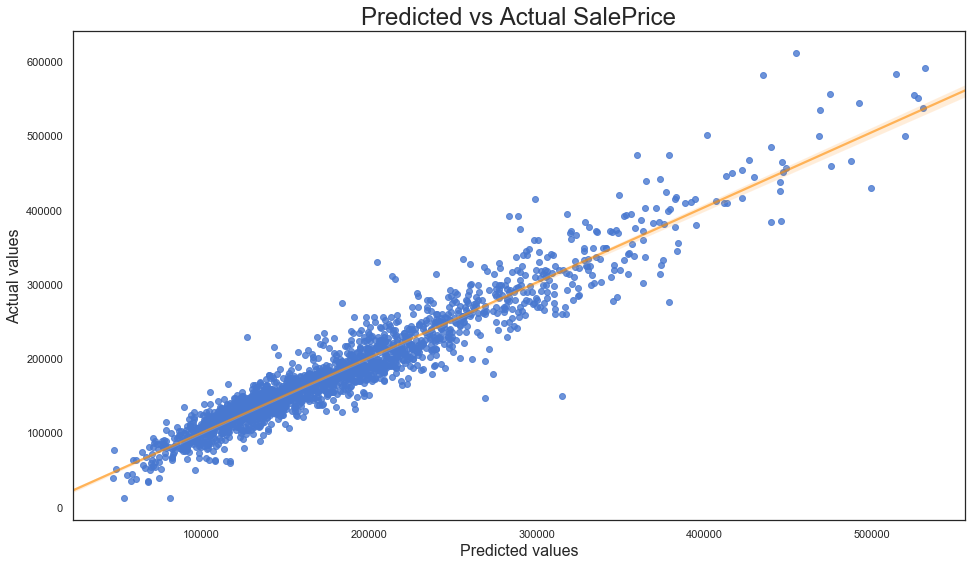

In [162]:
#Plotting a regression scatter of predicted training vs actual training prices
plt.figure(figsize=(16,9))
sns.regplot(np.exp(model.predict(X_train_sc)),np.exp(y_train), line_kws={'color':'darkorange', 'alpha':0.6})
plt.title('Predicted vs Actual SalePrice', fontsize=24)
plt.xlabel('Predicted values', fontsize=16)
plt.ylabel('Actual values', fontsize=16);

### Residual plots


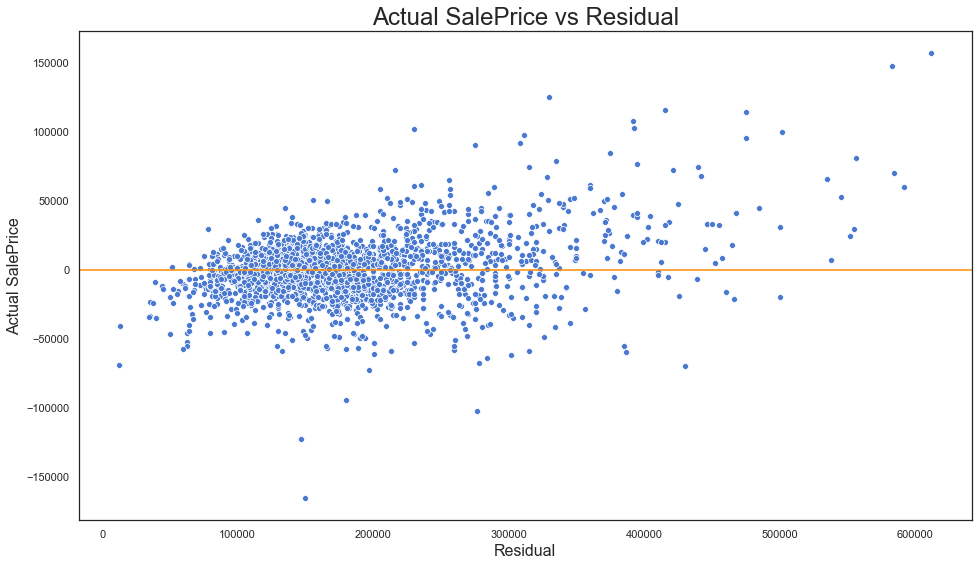

In [163]:
#Plotting the residuals
#Not entirely random as there is a clustering on the left side of the graph
residual = np.exp(y_train) - np.exp(model.predict(X_train_sc))

plt.figure(figsize=(16,9))
sns.scatterplot(np.exp(y_train), residual).axhline(xmin=0, xmax=max(np.exp(y_train)), color='darkorange')
plt.title('Actual SalePrice vs Residual', fontsize=24)
plt.xlabel('Residual', fontsize=16)
plt.ylabel('Actual SalePrice', fontsize=16);

0.48885999258111396
6.401994969751249


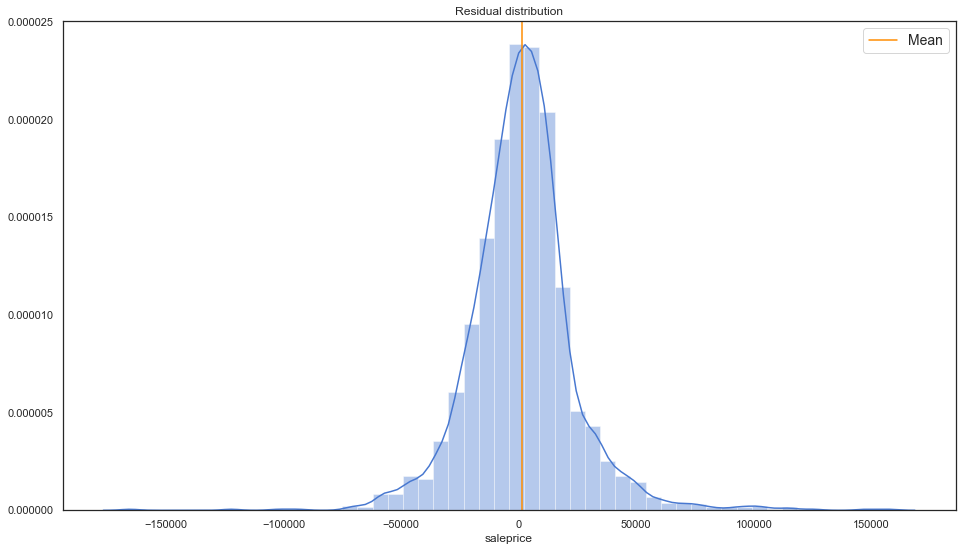

In [164]:
#Plotting the distribution of the residuals
#While not normally distributed, the skew is close to 0
plt.figure(figsize=(16,9))
sns.distplot(residual).axvline((residual).mean(), color='darkorange')
plt.title('Residual distribution')
plt.legend({'Mean': residual.mean()}, fontsize=14);

print(residual.skew())
print(residual.kurt())

## Business Recommendations

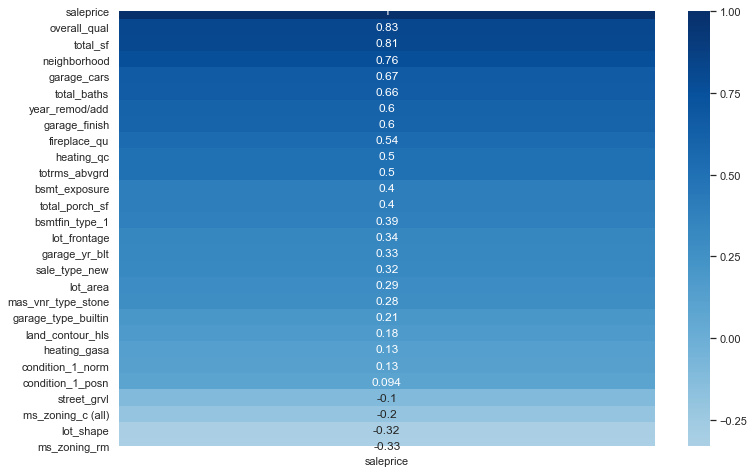

In [165]:
figure = plt.figure(figsize=(12,8))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='Blues', center=0)

Linear regression allows us to be able to **predict** the price of a house using various factors. Additionally, it enables one to be able to **measure the influence** of a factor onto the price of a house, how strong of an influence it has on the price as well as the direction of influence, positive or negative.


### Which features appear to add the most value to a home?
As seen from the heatmap above, the best feature for predicting housing prices are:
- Overall quality of the house
- Total square feet of the house
- The neighborhood the house is located in


### Which features hurt the value of a home the most?
- If the house is in a residential medium density zoning area
- Interestingly, if the house has a *regular* lot shape


### What are things that homeowners could improve in their homes to increase the value?
- Having a recent remodel of the house will drive the price up,
- Ensuring that the house has good quality heating for the winter is important


### What neighborhoods seem like they might be a good investment?
- The first instinct would be to say that the neighborhoods that fall into the cluster 8, as these have the highest price. However, the model does not tell us how the different neighborhoods have increased in saleprice over time. As seen from the barchart below, neighborhood zone 1 and 8 are on a decline in price.
- The two zones with increasing saleprice as zone 4(Mitchel) and 6 (ClearCr, Somerst, Timber, Veenker)

### Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
- For the most part i do feel that it is generally replicable across cities, with minor tweaks to variables collected like neighborhood, zoning etc. But it does depend on if the other city has the data of these variables on hand.


### Further exploration
There can be some improvements made to the model:
- Explore the relationship between lot frontage, lot area and neighborhood. I could use a better imputation method like Proper Multiple Stochastic Regression Imputation.

- The current iteration of the model does not explain prices of houses above the \$400,000 mark in a linear fashion

- Interpreting the model intercept might not be so straight forward as I cannot np.exp(model.coef_) because that returns 1

- Use other machine learning tools like random forest classifiers or log regression. The best models always uses an ensemble of different machine learning models. For example the neighborhood classifier could be done using KMeans. But that would be out of scope!

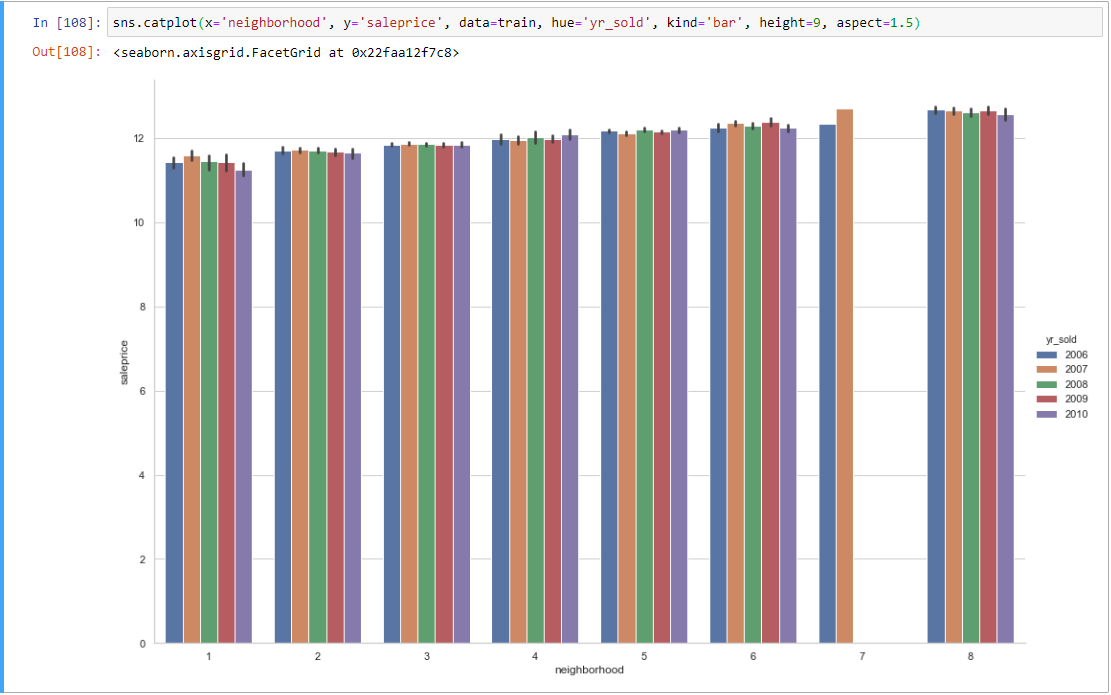